## 玻璃分类规律

### 导入第三方库

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import Image


#### 数据预处理

In [4]:
excelpath = "merged_excel.xlsx"
dateGlass = pd.read_excel(excelpath, sheet_name="standard")

# 提取出不同类型的 文物数据
dateGlass_not_wind = dateGlass[dateGlass["表面风化"] == 0]  # 未风化
dateGlass_wind = dateGlass[dateGlass["表面风化"] == 1]  # 风化

In [5]:
# 分割数据集
def GetDate(dateglass):
    # 获取 X 数据
    date_x = np.asarray(dateGlass.iloc[:,2:16])
    # 获取对应的 Y 数据
    date_y = np.asarray(dateGlass.iloc[:,-2])
    # 划分数据
    X_train, X_test, y_train, y_test = train_test_split(date_x,date_y,test_size=0.2)
    # 数据库的决策名称表
    names = list(dateGlass.iloc[:,2:16].columns)
    return X_train, X_test, y_train, y_test, names

####  第二种算法: 决策树模型

In [6]:
def DecisionTreeClassify(X_train, y_train, X_test, names):
    # 创建实例
    clf = DecisionTreeClassifier(random_state=42)
    # 训练模型
    clf.fit(X_train, y_train)
    # 进行预测
    y_pred = clf.predict(X_test)
    # 绘制树结构
    rules = export_text(clf, feature_names=names)
    return clf, y_pred, rules

In [7]:
# 未风化 决策树模型
X_train_nw, X_test_nw, y_train_nw, y_test_nw, names_nw = GetDate(dateGlass_not_wind)
clf_nw, y_pred_nw, rules_nw = DecisionTreeClassify(X_train_nw, y_train_nw, X_test_nw,names_nw)
print(rules_nw)

|--- 氧化铅(PbO) <= 6.08
|   |--- class: 1
|--- 氧化铅(PbO) >  6.08
|   |--- class: 0



In [8]:
# 风化 决策树模型
X_train_w, X_test_w, y_train_w, y_test_w, names_w = GetDate(dateGlass_wind)
clf_w, y_pred_w, rules_w = DecisionTreeClassify(X_train_w, y_train_w, X_test_w,names_w)
print(rules_w)

|--- 氧化铅(PbO) <= 5.97
|   |--- class: 1
|--- 氧化铅(PbO) >  5.97
|   |--- class: 0



#### 评估模型

In [9]:
def evalTreeModel(y_test, y_pred):
    # 混淆矩阵
    conf_matrix = confusion_matrix(y_test, y_pred)
    # 计算召回率
    recall = recall_score(y_test, y_pred)
    # 计算精确率
    precision = precision_score(y_test, y_pred)
    # 计算F1分数
    f1 = f1_score(y_test, y_pred)
    # 统计表格
    modelEstValue = {
        "recall": recall,
        "f1_score":f1,
        "precision":precision
    }
    modelEstValueDf = pd.DataFrame(modelEstValue,index=["value"])
    return conf_matrix, modelEstValueDf

In [10]:
def plot_conf_matrix(conf_matrix):
    # 绘制混淆矩阵
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [11]:
# 计算未风化 决策树模型的评价指标
conf_matrix_nw, modelEstValueDf_nw = evalTreeModel(y_test_nw,y_pred_nw)
# 计算风化 决策树模型的评价指标
conf_matrix_w, modelEstValueDf_w = evalTreeModel(y_test_w,y_pred_w)

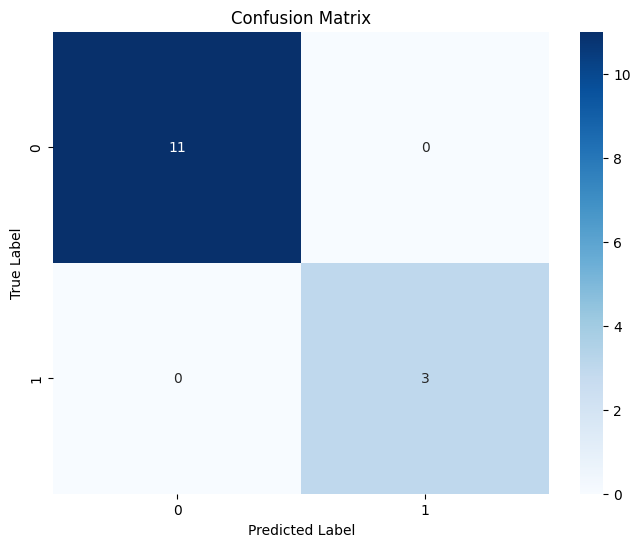

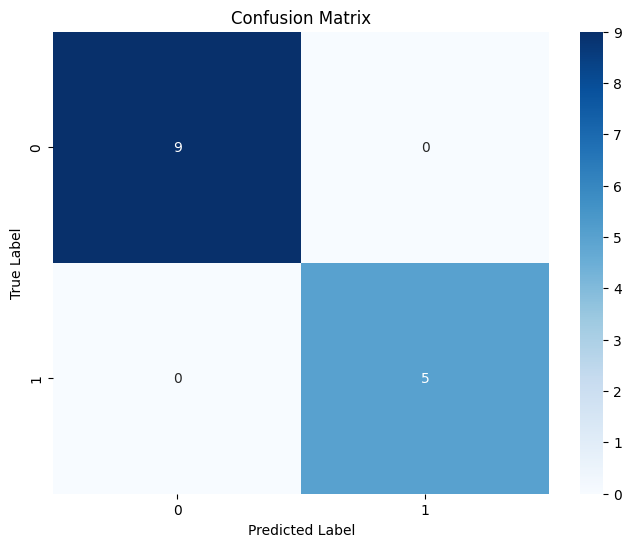

(None, None)

In [12]:
plot_conf_matrix(conf_matrix_nw),plot_conf_matrix(conf_matrix_w)

In [13]:
modelEstValueDf_nw

,recall,f1_score,precision
value,1.0,1.0,1.0


In [14]:
modelEstValueDf_w

,recall,f1_score,precision
value,1.0,1.0,1.0


可视化决策树模型/ 描述决策点

In [15]:
def ImageTreeGraph(clf,feature_names, class_names=["铅钡","高钾"]):
    # 假定clf是已经训练好的决策树模型，iris是加载的数据集
    dot_data = export_graphviz(clf, out_file=None,
                            feature_names = feature_names,
                            class_names = class_names,
                            filled=True, rounded=True,
                            special_characters=True)

    # 使用pydotplus将dot数据转换为图像
    graph = pydotplus.graph_from_dot_data(dot_data)
    return graph

In [16]:
graph_nw = ImageTreeGraph(clf_nw, names_nw)
graph_w = ImageTreeGraph(clf_w, names_w)
png_image_nw = graph_nw.create_png()
png_image_w = graph_w.create_png()

NameError: name 'pydotplus' is not defined

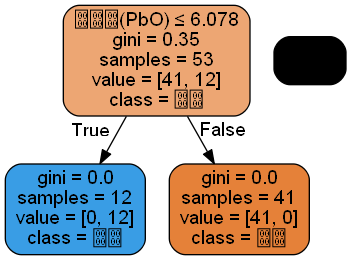

In [ ]:
Image(png_image_nw)

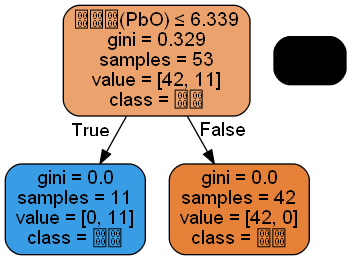

In [ ]:
Image(png_image_w)